In [2]:
# Importing essentials liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Read csv file
data = pd.read_csv("dataset.csv")


In [4]:
# Look on few columns from top
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [5]:
# Basic info of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [6]:
# Statistical overview of dataset
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
# Let's check missing value in dataset
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
# Attributes in dataset
columns_list = data.columns
print(columns_list)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')


dataset.shape

In [9]:
# Class Balance Check
# Display the balance of 'LUNG_CANCER' classes
class_balance = data['LUNG_CANCER'].value_counts(normalize=True)
print(class_balance)

LUNG_CANCER
YES    0.506
NO     0.494
Name: proportion, dtype: float64


In [10]:
# Encoding Categorical Variables
# Initialize label encoder

from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

In [11]:
# Encode 'GENDER' and 'LUNG_CANCER' columns to numeric values
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

In [12]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


In [13]:
# Let's figure out the correlation between attributes
correlation_matrix = data.corr()


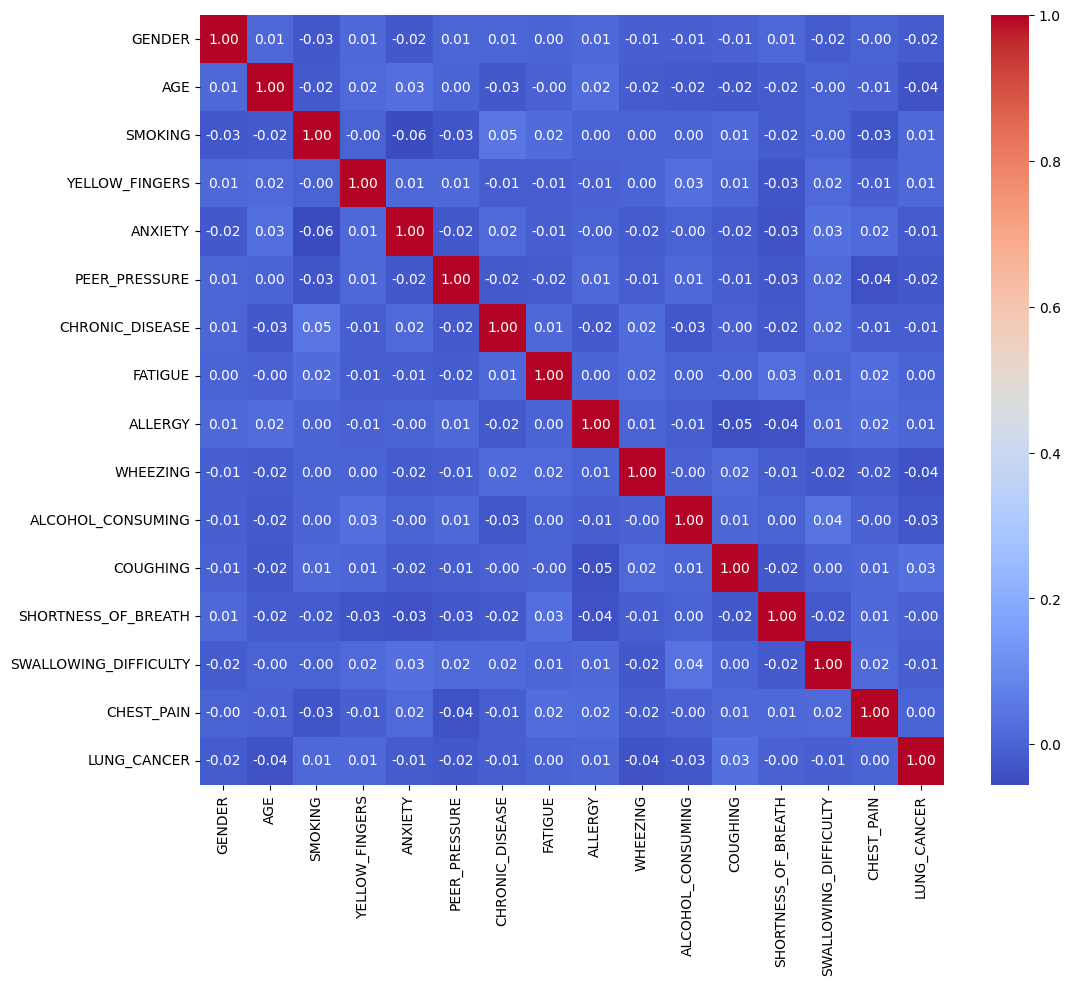

In [14]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [36]:

from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores for feature importance
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']
mutual_info = mutual_info_classif(X, y, random_state=12)

# Convert mutual information scores to a series for easier viewing
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
mutual_info_series


FATIGUE                  0.016496
ALCOHOL_CONSUMING        0.005257
SHORTNESS_OF_BREATH      0.005247
SWALLOWING_DIFFICULTY    0.002232
GENDER                   0.000000
AGE                      0.000000
SMOKING                  0.000000
CHRONIC_DISEASE          0.000000
PEER_PRESSURE            0.000000
ANXIETY                  0.000000
YELLOW_FINGERS           0.000000
WHEEZING                 0.000000
ALLERGY                  0.000000
COUGHING                 0.000000
CHEST_PAIN               0.000000
dtype: float64

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize model and RFE
model = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=model, n_features_to_select=7)  # Choose the number of top features to keep
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_features)


Selected Features by RFE:
 Index(['GENDER', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING'],
      dtype='object')


Steps Involves: <br>
    Model Training<br>
    Hyperparameter Tuning with Grid Search<br>
    Cross-Validation<br>
    Cost Function (Cross-Entropy Loss)<br>
    Final Evaluation on Test Set<br>


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report


In [41]:

class LungCancerModel:
    def __init__(self, data, target_column):
        """
        Initialize with data and the target column.
        """
        self.data = data
        self.target_column = target_column
        self.models = {}
        self.results = {}

    def preprocess_data(self):
        """
        Encodes categorical features and scales numerical data.
        """
        # Encode target variable if necessary
        if self.data[self.target_column].dtype == 'object':
            label_encoder = LabelEncoder()
            self.data[self.target_column] = label_encoder.fit_transform(self.data[self.target_column])
        
        # Separate features and target
        X = self.data[selected_features]
        y = self.data[self.target_column]
        
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        return train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    def train_model(self, model, param_grid, X_train, y_train):
        """
        Trains the model using GridSearchCV for hyperparameter tuning.
        """
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss')
        grid_search.fit(X_train, y_train)
        return grid_search.best_estimator_, grid_search.best_params_

    def evaluate_model(self, model, X_train, X_val, X_test, y_train, y_val, y_test):
        """
        Evaluates the model on training, validation, and test sets and stores the results.
        """
        # Training loss
        y_train_probs = model.predict_proba(X_train)
        train_loss = log_loss(y_train, y_train_probs)

        # Validation loss
        y_val_probs = model.predict_proba(X_val)
        val_loss = log_loss(y_val, y_val_probs)

        # Test loss and accuracy
        y_test_probs = model.predict_proba(X_test)
        test_loss = log_loss(y_test, y_test_probs)
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        
        return {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy
        }

    def logistic_regression(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        Logistic Regression Model with Grid Search.
        """
        param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
        model, best_params = self.train_model(LogisticRegression(solver='liblinear'), param_grid, X_train, y_train)
        print("Best Parameters for Logistic Regression:", best_params)
        self.models['log_reg'] = model
        self.results['log_reg'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

    def mlp_classifier(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        Multi-layer Perceptron Model with Grid Search.
        """
        param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
        model, best_params = self.train_model(MLPClassifier(max_iter=200), param_grid, X_train, y_train)
        print("Best Parameters for MLP:", best_params)
        self.models['mlp'] = model
        self.results['mlp'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

    def naive_bayes(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        Naive Bayes Model without parameter tuning.
        """
        model = GaussianNB().fit(X_train, y_train)
        self.models['nb'] = model
        self.results['nb'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

    def dummy_classifier(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        Baseline Dummy Model with Grid Search.
        """
        param_grid = {'strategy': ['most_frequent', 'stratified', 'uniform']}
        model, best_params = self.train_model(DummyClassifier(), param_grid, X_train, y_train)
        print("Best Parameters for Dummy Classifier:", best_params)
        self.models['dummy'] = model
        self.results['dummy'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)


    def svm_classifier(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        Support Vector Machine (SVM) with Grid Search.
        """
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'probability': [True]}
        model, best_params = self.train_model(SVC(), param_grid, X_train, y_train)
        print("Best Parameters for SVM:", best_params)
        self.models['svm'] = model
        self.results['svm'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

    
    def xgboost_classifier(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        XGBoost Classifier with Grid Search.
        """
        param_grid = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
        model, best_params = self.train_model(XGBClassifier(eval_metric='logloss'), param_grid, X_train, y_train)
        print("Best Parameters for XGBoost:", best_params)
        self.models['xgboost'] = model
        self.results['xgboost'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)


    def random_forest_classifier(self, X_train, y_train, X_val, X_test, y_val, y_test):
        """
        Random Forest Classifier with Grid Search.
        """
        param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
        model, best_params = self.train_model(RandomForestClassifier(), param_grid, X_train, y_train)
        print("Best Parameters for Random Forest:", best_params)
        self.models['random_forest'] = model
        self.results['random_forest'] = self.evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)


    def display_results(self):
        """
        Displays the evaluation results of all models.
        """
        for model_name, metrics in self.results.items():
            print(f"\n{model_name.upper()} Results:")
            print(f"Training Loss: {metrics['train_loss']:.4f}")
            print(f"Validation Loss: {metrics['val_loss']:.4f}")
            print(f"Test Loss: {metrics['test_loss']:.4f}")
            print(f"Test Accuracy: {metrics['test_accuracy']:.4f}")



In [42]:

target_column = 'LUNG_CANCER'  # Replace with the actual target column

# Initialize the model class
lung_cancer_model = LungCancerModel(data, target_column)



In [43]:
# Preprocess data and split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = lung_cancer_model.preprocess_data()
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train and evaluate each model
lung_cancer_model.logistic_regression(X_train, y_train, X_val, X_test, y_val, y_test)

# Display results
lung_cancer_model.display_results()

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}

LOG_REG Results:
Training Loss: 0.6899
Validation Loss: 0.6901
Test Loss: 0.6972
Test Accuracy: 0.4756


In [44]:
# lung_cancer_model.mlp_classifier(X_train, y_train, X_val, X_test, y_val, y_test)
# lung_cancer_model.display_results()

In [23]:
lung_cancer_model.naive_bayes(X_train, y_train, X_val, X_test, y_val, y_test)
lung_cancer_model.display_results()



LOG_REG Results:
Training Loss: 0.6883
Validation Loss: 0.6944
Test Loss: 0.6976
Test Accuracy: 0.5067

NB Results:
Training Loss: 0.6880
Validation Loss: 0.6955
Test Loss: 0.6980
Test Accuracy: 0.5156


In [45]:
lung_cancer_model.svm_classifier(X_train, y_train, X_val, X_test, y_val, y_test)
lung_cancer_model.display_results()


KeyboardInterrupt: 

In [27]:
lung_cancer_model.xgboost_classifier(X_train, y_train, X_val, X_test, y_val, y_test)
lung_cancer_model.display_results()

c:\Users\Binod Tandan\Desktop\UNT\Second Semester\Applied Machine Learning (DTSC 5505)\Bonus Project\Machine-Learning-Lung-Cancer-Detection\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Binod Tandan\Desktop\UNT\Second Semester\Applied Machine Learning (DTSC 5505)\Bonus Project\Machine-Learning-Lung-Cancer-Detection\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Binod Tandan\Desktop\UNT\Second Semester\Applied Machine Learning (DTSC 5505)\Bonus Project\Machine-Learning-Lung

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}

LOG_REG Results:
Training Loss: 0.6883
Validation Loss: 0.6944
Test Loss: 0.6976
Test Accuracy: 0.5067

NB Results:
Training Loss: 0.6880
Validation Loss: 0.6955
Test Loss: 0.6980
Test Accuracy: 0.5156

SVM Results:
Training Loss: 0.6917
Validation Loss: 0.6913
Test Loss: 0.6961
Test Accuracy: 0.4778

XGBOOST Results:
Training Loss: 0.6742
Validation Loss: 0.6906
Test Loss: 0.6985
Test Accuracy: 0.5067


c:\Users\Binod Tandan\Desktop\UNT\Second Semester\Applied Machine Learning (DTSC 5505)\Bonus Project\Machine-Learning-Lung-Cancer-Detection\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
